In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype("float64")
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
df.shape

(263, 20)

In [6]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [7]:
ridge_model

Ridge(alpha=0.1)

In [8]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [9]:
ridge_model.intercept_

-4.578626905723581

In [11]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [12]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [13]:
ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    

In [ ]:
katsayilar

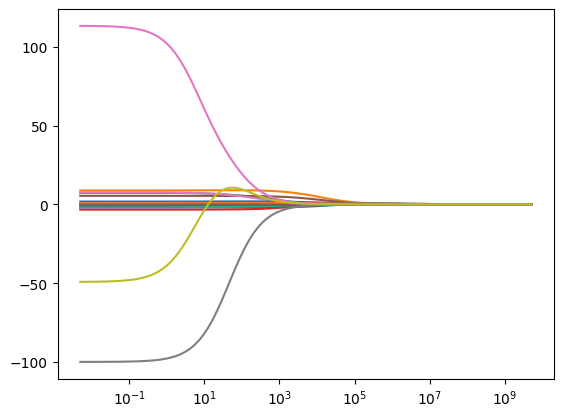

In [15]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

##TAHMİN

In [17]:
y_pred = ridge_model.predict(X_train)

In [18]:
y_pred[0:10]

array([ 377.43897818,  802.20172846,  495.61262179,  112.53310635,
        426.2235674 , 1004.23269616,  154.7234935 ,  362.55653134,
        485.36598379,  918.70526984])

In [19]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [20]:
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))

In [21]:
RMSE

289.3292830531484

In [23]:
from sklearn.model_selection import cross_val_score

In [26]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring= "neg_mean_squared_error")))

351.8239478850044

In [27]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [29]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

357.05179222828446

MODEL TUNİNG

In [32]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730243

In [34]:
np.random.randint(0,1000,100)

array([289, 836,  70, 951,  90, 678, 604, 539, 363, 286, 777,  37, 473,
       287, 555, 644, 859,  11, 371, 889, 852, 480, 533, 588, 648, 682,
       699, 140, 756, 506,  89,   4,  32, 143, 557, 740,  84, 765, 273,
       390, 621, 793, 521, 390, 123, 743,  62, 170, 204, 187, 792, 494,
       876, 234, 797, 336, 908, 539, 318, 454,  94, 601, 609, 254, 663,
       934, 452, 183,  50, 349, 873, 437, 145, 751, 871, 126, 601, 368,
       246, 933,  86, 243, 840, 519, 795, 153, 275, 656, 680, 226, 579,
       567, 964, 666, 583,  38, 410, 475, 758, 424])

In [35]:
lambdalar1 = np.random.randint(0,1000,100)

In [36]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [49]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring="neg_mean_squared_error", cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([346, 640, 883, 444, 897, 474, 795, 443, 264, 415,  39, 460, 957,
       415,  96, 825, 255, 182, 208, 640, 938, 373, 775, 345, 432, 905,
       528, 832, 251, 137, 711, 688, 990, 511, 999,  36, 283, 137, 655,
       902, 775, 991, 919, 477, 310, 868,  88, 969, 471,  73, 847, 188,
       493, 839, 645, 696, 606, 325, 251, 789, 728, 651, 610, 984, 553,
       741,  83, 939, 660, 986, 305, 914, 667, 835, 118, 368, 192, 663,
       760, 856,  98, 437, 300, 130, 414, 827, 633,  71, 584, 569, 257,
       280, 244, 398,  91, 142,  89,  70, 691, 147]),
        cv=10, scoring='neg_mean_squared_error')

In [50]:
ridgecv.alpha_

36

In [51]:
#final modeli
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [52]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.81293721199677